In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('output/output_df.csv')

# Seach Volume Distribution Per Cluster

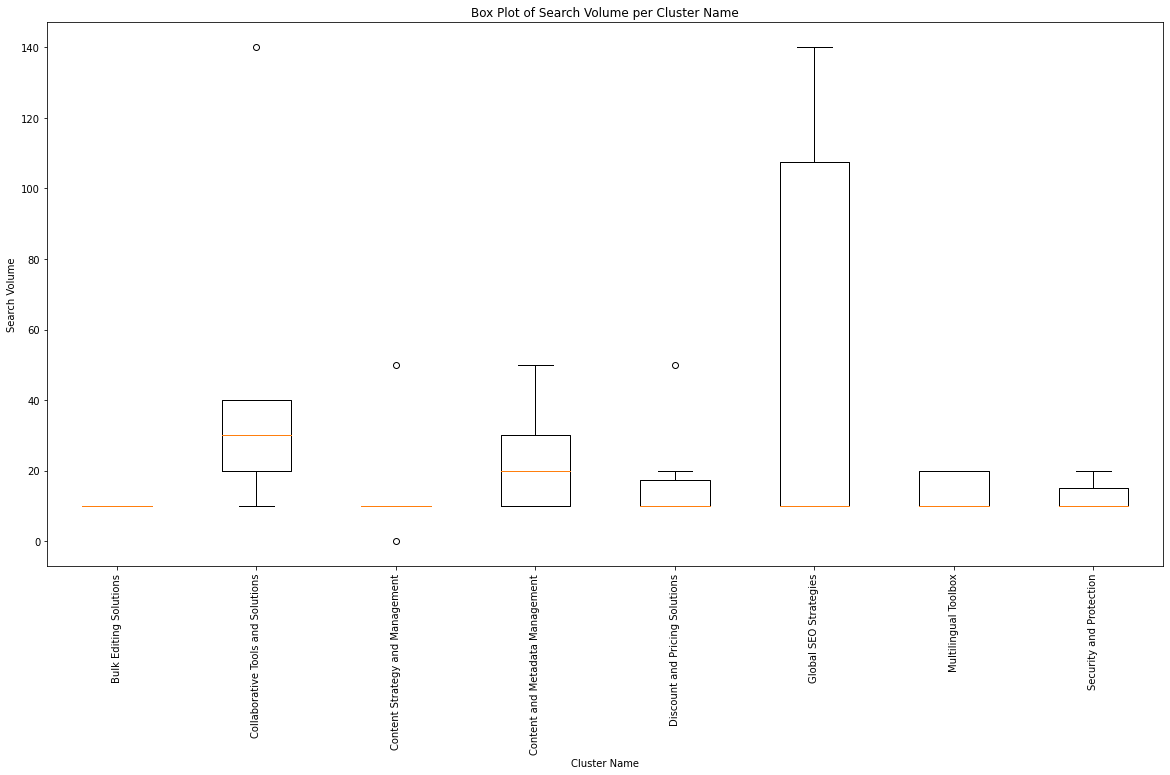

In [10]:
# Group the dataframe by cluster_name and calculate the search volume
grouped_df = df.groupby('cluster_name')['search_volume'].apply(list)

# Create a list of search volumes per cluster_name
search_volumes = grouped_df.values.tolist()

# Create a list of cluster names
cluster_names = grouped_df.index.tolist()

# Create the box plot
plt.figure(figsize=(20, 10))
plt.boxplot(search_volumes, labels=cluster_names)
plt.xlabel('Cluster Name')
plt.ylabel('Search Volume')
plt.title('Box Plot of Search Volume per Cluster Name')
plt.xticks(rotation=90)
plt.show()

# Best Keyword for each Cluster

In [20]:
# Calculate mean and standard deviation for competition_index and search_volume
mean_competition = df.groupby('cluster_name')['competition_index'].mean().reset_index()
mean_competition.columns = ['cluster_name', 'mean_competition_index']
std_competition = df.groupby('cluster_name')['competition_index'].std().reset_index()
std_competition.columns = ['cluster_name', 'std_competition_index']
mean_search_volume = df.groupby('cluster_name')['search_volume'].mean().reset_index()
mean_search_volume.columns = ['cluster_name', 'mean_search_volume']
std_search_volume = df.groupby('cluster_name')['search_volume'].std().reset_index()
std_search_volume.columns = ['cluster_name', 'std_search_volume']

In [22]:
df = df.merge(mean_competition, on='cluster_name')\
    .merge(std_competition, on='cluster_name')\
    .merge(mean_search_volume, on='cluster_name')\
    .merge(std_search_volume, on='cluster_name')

In [30]:
# Normalize competition_index and search_volume using mean and standard deviation
df['competition_index_normalized'] = (df['competition_index'] - df['mean_competition_index'] ) / df['std_competition_index']
df['search_volume_normalized'] = (df['competition_index'] - df['mean_search_volume'] ) / df['std_search_volume']

# Calculate keyword_score by adding competition_index_normalized and search_volume_normalized
df['keyword_score'] = df['competition_index_normalized'] + df['search_volume_normalized']

# Sort the dataframe by keyword_score for each cluster
df_sorted = df.groupby('cluster_name').apply(lambda x: x.sort_values('keyword_score', ascending=False))

# Print the sorted dataframe for each cluster
for cluster_name in df_sorted['cluster_name'].unique():
    cluster_df = df_sorted[df_sorted['cluster_name'] == cluster_name].reset_index(drop=True)
    print(f"Cluster Name: {cluster_name}")
    for keyword in cluster_df.head()['keyword'].tolist():
        print(keyword)
    print('\n')

Cluster Name: Bulk Editing Solutions
bulk edit attributes woocommerce
woocommerce bulk edit variation prices
gravity forms bulk actions
woocommerce bulk edit categories


Cluster Name: Collaborative Tools and Solutions
digital transformation tools
cloud based collaboration
secure collaboration tools
collaborative feedback
enterprise collaboration


Cluster Name: Content Strategy and Management
how to create tone of voice guidelines
content project management
editorial management system
how to scale content creation
global content strategy


Cluster Name: Content and Metadata Management
document management in wordpress
wordpress user role permissions
wordpress image description
wordpress metadata
add excerpt to pages wordpress


Cluster Name: Discount and Pricing Solutions
woocommerce dynamic pricing
woocommerce discount rules
woocommerce apply discount to all products
woocommerce shipping discount
woocommerce chained products


Cluster Name: Global SEO Strategies
programmatic seo wordp

# Trending Keyowrds

In [33]:
for cluster_name in df['cluster_name'].unique():
    cluster_df = df[df['cluster_name'] == cluster_name].reset_index(drop=True)
    print(f"Cluster Name: {cluster_name}")
    for keyword in cluster_df.sort_values('trend',ascending=False).head(2)['keyword'].tolist():
        print(keyword)
    print('\n')

Cluster Name: Content and Metadata Management
wordpress user meta
woocommerce metadata


Cluster Name: Multilingual Toolbox
best wordpress plugins for writers
multilingual social media


Cluster Name: Bulk Editing Solutions
bulk edit attributes woocommerce
gravity forms bulk actions


Cluster Name: Collaborative Tools and Solutions
digital transformation tools
secure collaboration tools


Cluster Name: Discount and Pricing Solutions
woocommerce dynamic pricing
woocommerce apply discount to all products


Cluster Name: Content Strategy and Management
internal documentation
editorial management system


Cluster Name: Global SEO Strategies
google search console country targeting
local seo vs global seo


Cluster Name: Security and Protection
wordpress attacks
secure forms wordpress




In [31]:
df.head()

,keyword,competition,competition_index,search_volume,cpc,trend,cluster_int,cluster_name,mean_competition_index,std_competition_index,mean_search_volume,std_search_volume,competition_index_normalized,search_volume_normalized,keyword_score
0,add excerpt to pages wordpress,LOW,0.0,10,NaN,0.0,6,Content and Metadata Management,6.0,14.242793,22.5,14.880476,-0.421266,-1.512048,-1.933314
1,add meta tag to wordpress,LOW,0.0,50,NaN,-2.9,6,Content and Metadata Management,6.0,14.242793,22.5,14.880476,-0.421266,-1.512048,-1.933314
2,document management in wordpress,MEDIUM,41.0,30,4.03,0.1,6,Content and Metadata Management,6.0,14.242793,22.5,14.880476,2.457383,1.243240,3.700623
3,woocommerce metadata,LOW,0.0,10,NaN,0.5,6,Content and Metadata Management,6.0,14.242793,22.5,14.880476,-0.421266,-1.512048,-1.933314
4,wordpress image description,LOW,1.0,10,NaN,0.0,6,Content and Metadata Management,6.0,14.242793,22.5,14.880476,-0.351055,-1.444846,-1.795901
